In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData(fileName):
    #load whole data from file
    data = np.loadtxt(fileName, delimiter = ',', skiprows = 1)
    
    #convert data into matrix
    data = np.matrix(data)
    
    #fetching features vectors
    X = data[:,:-1]         #all rows and column except last column

    #fetching target vectors
    y = data[:,-1]         # all rows and last column
    
    return X,y
    

In [3]:
def featureNormalization(X):
    size = np.shape(X)    # size = (46,2)
    size = size[1]
    mean = np.zeros(size)   #[0 0]
    sigma = np.zeros(size)  #[0 0]
    for i in range(size):
        mean[i] = np.mean(X[:,i], axis = 0)    #mean of every features vector , axis 0 means column-wise
        sigma[i] = np.std(X[:,i], axis = 0)     # standard deviation of every vector
        X[:,i] = (X[:,i] - mean[i])/sigma[i]
    return mean,sigma,X
    

In [4]:
def addInterceptTermToInputFeatures(X,m):
    interceptTerm = np.ones(shape = m)[...,None]
    X = np.concatenate((interceptTerm,X),axis = 1)    #axis 1 means
    return X

In [5]:
def computeCostFunction(X,y,theta):
    m = np.size(y)
    hypo = np.matmul(X , theta)
    tmp = np.square( np.subtract(hypo , y) )
    tmp = np.sum(tmp)
    J = tmp / (2*m)
    return J

In [6]:
def gradientDescentFunction(X,y,theta,num_iters,alpha):
    m = np.size(y)
    J_history = np.zeros(num_iters)[...,None]
    for i in range(num_iters):
        tmp = np.subtract(np.matmul(X , theta) , y)
        tmp = np.matmul(tmp.transpose() , X)
        tmp = tmp.transpose() * (alpha/m)
        theta = np.subtract(theta , tmp)
        
        J_history[i] = computeCostFunction(X,y,theta)
    return theta,J_history
    

In [12]:
def plotCostVsNumIter(num_iters, cost, xLabel = 'X', yLabel = 'Y', markerColor = 'b', markerType = '-',lineWidth = 5, markerSize = 5):
    size = np.size(cost)
    x = [i for i in range(size)]
    plt.plot(x, cost)
    

In [13]:
def plotLinearRegressionFittingCurve(x, y, markerType, markerColor, markerSize):
    pass

Cost predicted for 1650 sq feet,3 bedrooms = $ 288275.834972


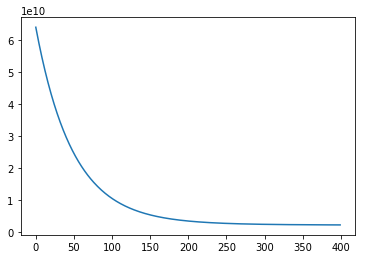

In [14]:
X,y = loadData(fileName = '/home/raj/Desktop/Machine Learning/machine-learning-ex1/ex1/ex1data2.txt')
m = np.size(y)
mean,sigma,X = featureNormalization(X)

X = addInterceptTermToInputFeatures(X,m)

#initialize theta  as parameter vector
theta = np.zeros(shape = X.shape[1])[...,None]
#learning rate
alpha = 0.01

#number of iterations
num_iters = 400
theta,J_history = gradientDescentFunction(X,y,theta,num_iters,alpha)

plotCostVsNumIter(num_iters = num_iters, cost = J_history, xLabel = 'Number of Iterations', yLabel = 'Cost J', markerColor = 'b',markerType = '-', markerSize = 5)

# cost for 1650 sq feet and 3 bedroom
x = [1 , (1650 - mean[0])/sigma[0], (3-mean[1])/sigma[1]]
pricePredicted = x*theta
print('Cost predicted for 1650 sq feet,3 bedrooms = $ %f'%pricePredicted)
